# Relatório e código do Trabalho Prático de Análise e Transformação de Dados

## 1. Importar Sinais Necessários

Para importar os dados necessários, começamos por criar uma função que lê os ficheiros presentes numa pasta com os DataSets a analisar, e verfica se o formato do nome dos mesmos está de acordo com o necessário

Começaremos a nossa análise por ler o ficheiro, fazendo as verificações básicas á possibilidade de execução

In [97]:
dados = lerDados();
labels = lerLabel([dados{:,3}]);
activity_labels = lerActivityLabel()
if(~isa(dados,'cell'))
    return
end


activity_labels = 

  12x1 struct array with fields:

    Description
    Number




In [98]:
%%file lerDados.m
function data = lerDados()
PATH = "Data_PL2";
ficheiro_path = dir(PATH);
numero_ficheiros = length(ficheiro_path)-2;
data = cell(numero_ficheiros,3);
string_patern = digitsPattern;

for i = 1:numero_ficheiros
    dados_exp = str2double(extract(ficheiro_path(i+2).name, string_patern));
    if(length(dados_exp) ~= 2)
        warning("Erro a ler conteudo da pasta, verifique a sua pasta e o parsing do ficheiro " + ficheiro_path(i+2).name);
        data = [];
        break
    end
    data{i,1} = (load(PATH + '\' + ficheiro_path(i+2).name));
    data{i,2} = dados_exp(2); %Guardar utilizador
    data{i,3} = dados_exp(1); %Guardar numero experiencia
end

Created file 'C:\Users\User\Desktop\2ºAno\ATD\PROJETO\lerDados.m'.


In [99]:
%%file lerLabel.m
function label = lerLabel(experiencias)
PATH = "Help\labels.txt";
temp = load(PATH);

temp = temp(ismember(temp(:, 1),experiencias), :);

label = struct('exp_num', num2cell(temp(:, 1)), 'user', num2cell(temp(:, 2)), ...
'activity', num2cell(temp(:, 3)), 'start', num2cell(temp(:, 4)), ...
'end',num2cell(temp(:, 5)));

Created file 'C:\Users\User\Desktop\2ºAno\ATD\PROJETO\lerLabel.m'.


In [100]:
%%file lerActivityLabel.m

function label = lerActivityLabel()
PATH = "Help\activity_labels.txt";

temp = table2cell(readtable(PATH));
label = struct('Description', (temp(:, 2)), 'Number', temp(:, 1));

Created file 'C:\Users\User\Desktop\2ºAno\ATD\PROJETO\lerActivityLabel.m'.


## 2. Representar graficamente os sinais importados, identificando a atividade a que cada fragmento corresponde.

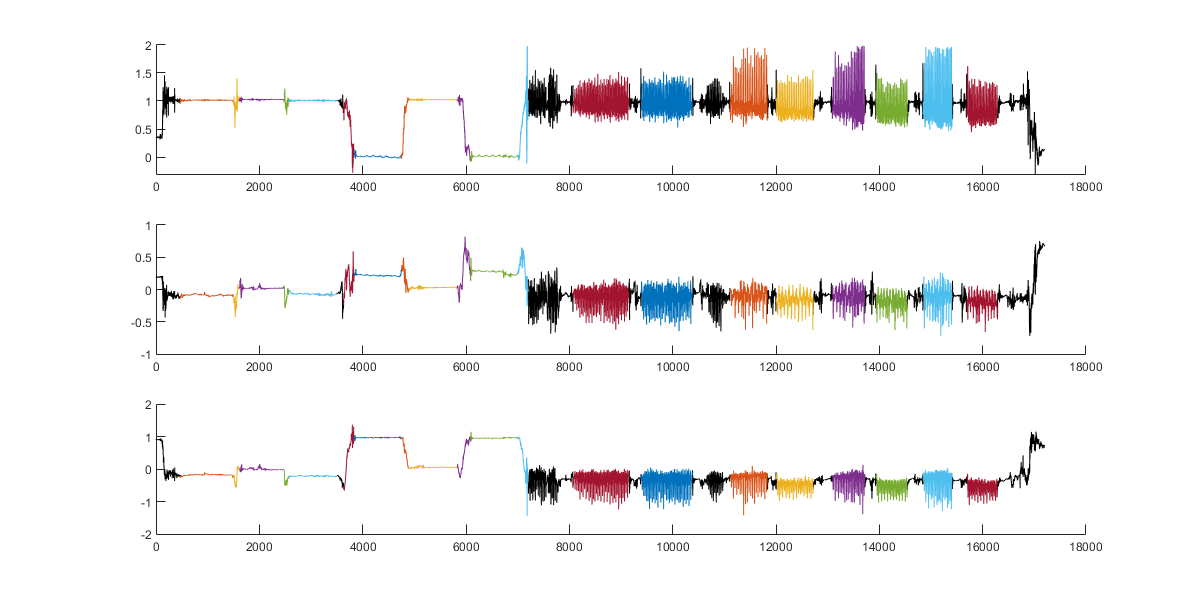

In [106]:
%plot inline -w 1200 -h 600
[indx,tf] = listdlg('ListString', strsplit(num2str([dados{:,3}])), 'SelectionMode','single', 'Name','Escolha uma experiencia para visualizar');
user_plot(dados, labels, activity_labels, indx)

In [103]:
%%file user_plot.m

function user_plot(dados, label, activity_label, index)

colors = {'#000000', '#4DBEEE','#D95319','#EDB120','#7E2F8E','#77AC30','#A2142F','#0072BD', '#00FF00','#FF0000', '#0000FF', '#00FFFF', '#FF00FF'};

exp_labels = find([label.exp_num] == dados{index, 3});
figure(1);

for j = 1:3
    subplot(3,1,j);
    hold on
    plot(dados{index,1}(:,j), 'k');
    for i = exp_labels
        plot(label(i).start:label(i).end, dados{index,1}(label(i).start:label(i).end,j));
    end
end

Created file 'C:\Users\User\Desktop\2ºAno\ATD\PROJETO\user_plot.m'.
